# **Project Plotting - Matplotlib Seaborn, Histograms and Boxplots**

The most recent ASC23 considered four major systems-based tracks with a view to providing region-focused contributions to inform the global stocktake among them Cities, urban and rural settlements, infrastructure, and transport.

In this assignment, you will be performing analysis more specifically on transport (vehicles and fuel efficiency).

The dataset has been provided for you.

You are tasked to make sense of this data that will later be used for AI purposes.

In [9]:
# prerequisite package imports

#YOUR CODE

import numpy as nmpy;
import pandas as pnds;
import matplotlib.pyplot as plt
import seaborn as sbrn;

:We'll work with the fuel economy dataset in this workspace.

Load the dataset and print at least 10 rows

1.   Load the dataset
2.   print atleast 10 rows of it



In [3]:
#YOUR CODE
csv_file_id = "16lgiSKILxHaLqmNUkCafQIAvyL2Y_KYf"
csv_download_url = f"https://drive.google.com/uc?id={csv_file_id}"
data = pnds.read_csv(csv_download_url)

print(data.head(10))


      id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   
5  32209       Lexus          GS 350  2013     Midsize Cars   
6  32210       Lexus      GS 350 AWD  2013     Midsize Cars   
7  32214     Hyundai   Genesis Coupe  2013  Subcompact Cars   
8  32215     Hyundai   Genesis Coupe  2013  Subcompact Cars   
9  32216     Hyundai   Genesis Coupe  2013  Subcompact Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6 

Play Around with Bin size as you create your Histogram

[Bin size in Matplot Lib](https://www.geeksforgeeks.org/bin-size-in-matplotlib-histogram/)

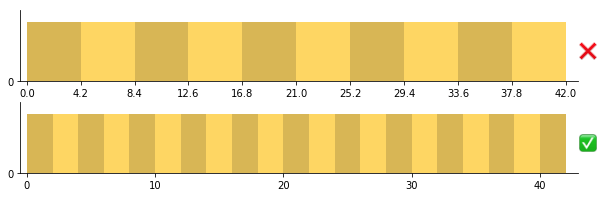

 **Description**

> Add blockquote


The dataset has a number of different statistics that describe fuel efficiency.


**TO DO**:
1.   create a _histogram_ that depicts the distribution of carbon Dioxide
2.   Play  around with different bin width sizes to see what best depicts the data

Create 2 more histograms based on columns of your choice








Columns available: Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore'],
      dtype='object')


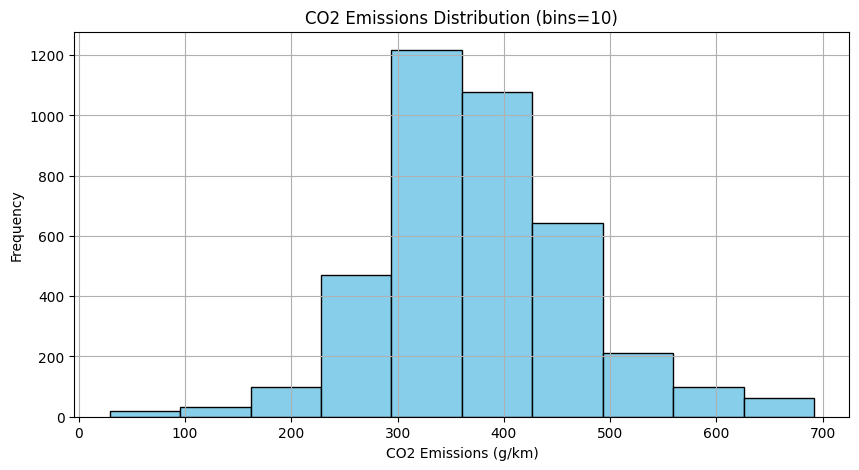

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [30]:
# YOUR CODE HERE
print("Columns available:", data.columns)
plt.figure(figsize=(10, 5))

plt.hist(data["co2"], bins=10, color='skyblue', edgecolor='black')
plt.title("CO2 Emissions Distribution (bins=10)")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
plt

# In this histogram, the distribution is roughly bell-shaped but slightly right-skewed, with the majority of vehicles emitting between 300-400 g/km of CO2.
# The peak occurs around 350 g/km representing the most common emission level in the dataset
# There are few vehicles having very low emissions (below 200 g/km) or very high emissions (above 600 g/km)
# It suggests that while there are some extremely fuel-efficient vehicles and some heavy polluters in the dataset, most vehicles are around a mid-range of CO2 emissions

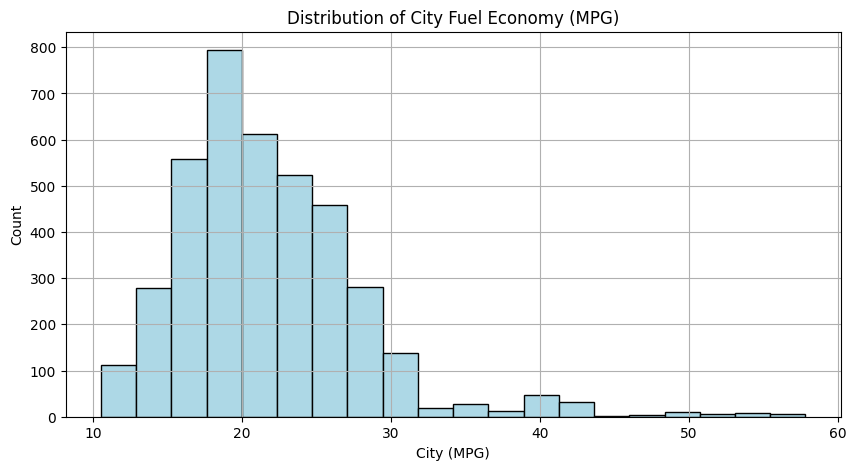

In [32]:
# YOUR CODE HERE

plt.figure(figsize=(10, 5))
plt.hist(data["city"], bins=20, color='lightblue', edgecolor='black')
plt.title("Distribution of City Fuel Economy (MPG)")
plt.xlabel("City (MPG)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# this histogram shows how many kilometers cars can go in the city using one gallon of fuel.
#Most cars use more fuel in city driving, with many getting only 15-25 kilometers per gallon.
#The biggest group (almost 800 cars) gets about 20 kilometers per gallon in the city.
#Very few cars can do more than 40 kilometers on one gallon when driving in town.

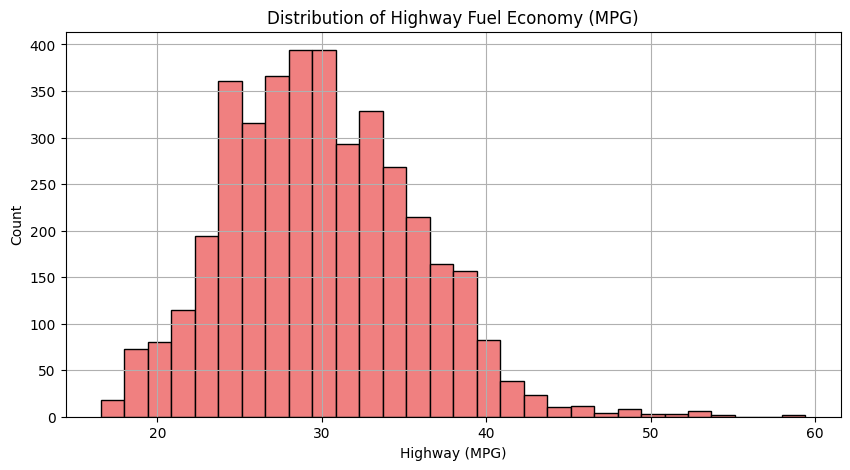

In [33]:
# YOUR CODE HERE

plt.figure(figsize=(10, 5))
plt.hist(data["highway"], bins=30, color='lightcoral', edgecolor='black')
plt.title("Distribution of Highway Fuel Economy (MPG)")
plt.xlabel("Highway (MPG)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


# This histogram shows how far cars go on highways using one gallon of fuel. Most cars manage between 25-35 miles per gallon, with the biggest group around 30 miles.
# Very few cars can go more than 45 miles on just one gallon - these super-saving cars are rare! The shape tells us that ordinary cars with average fuel use are what most people drive,
# while the super-efficient ones are not common on our roads.

**TO DO: Write Code that will give you the following plot as below:**

1.   create a heat map of the data
2.Interpret the data - What story does the visualization tell?

>

Finally What Columns would you delete Drop if the target is the ghg score? Justify your Answer





---

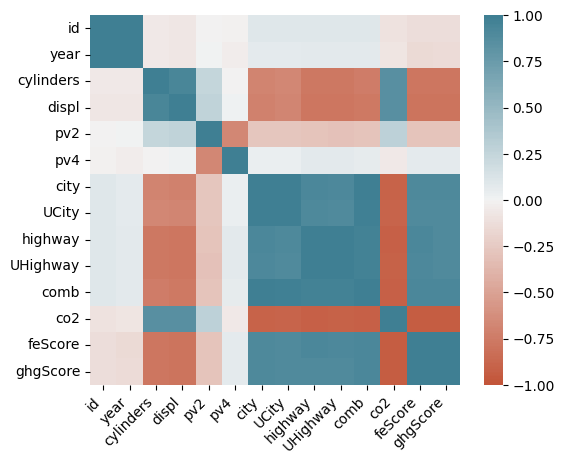

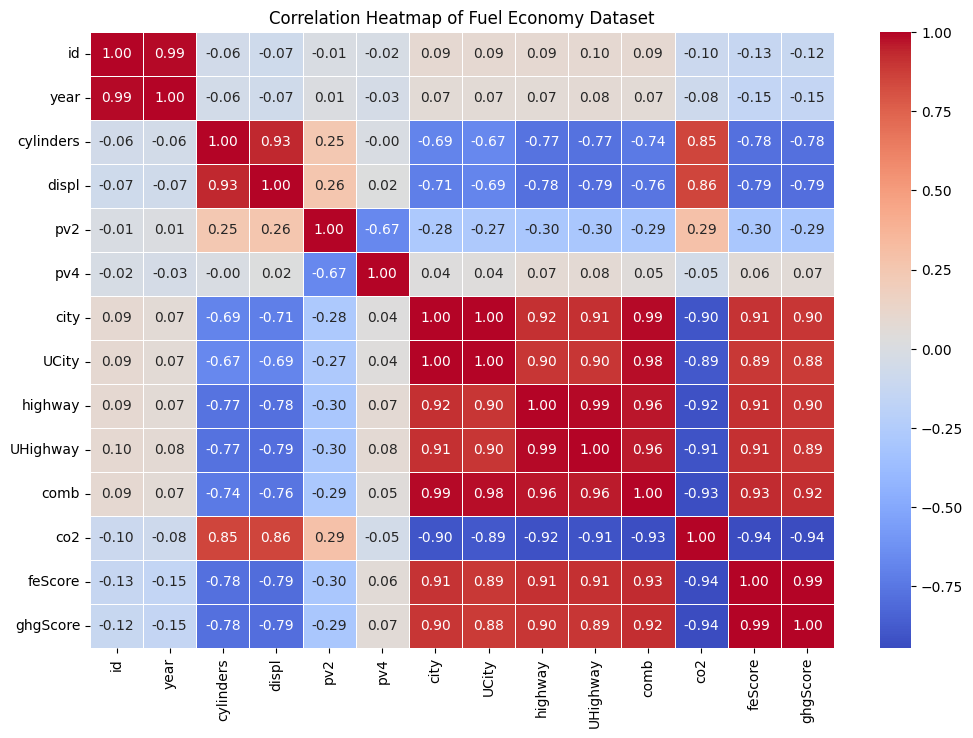

In [29]:
numeric_data = data.drop(columns=['make', 'model', 'VClass', 'drive', 'trans', 'fuelType'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sbrn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Fuel Economy Dataset")
plt.show()


#OBSERVATIONS
# The visualisation tells a story about the fundamental relationships in vehicle fuel economy
# The chart shows us that bigger engines with more cylinders and larger displacement (the size of the engine) are much worse for the environment.
# When a car has more cylinders, its greenhouse gas score (ghgScore) goes down significantly (-0.78 correlation), meaning it pollutes more.
# City and highway miles per gallon tell a different story - when these numbers go up, the greenhouse gas score also improves (around 0.90 correlation).
# This makes perfect sense! Cars that travel further on each gallon of gas create less pollution.
# The CO2 column confirms this by showing that vehicles with higher carbon dioxide emissions have much worse environmental scores (-0.94 correlation)
# Also the year of the car doesn't seem to matter much for emissions




# From the heatmap and correlation values:
# - Features like 'feScore', 'comb', 'city', 'highway', 'UCity', and 'UHighway' show a strong direct proportion to ghgScore with zero point ninety something values.
# - Features like 'co2', 'cylinders', and 'displ' etc .. behaves differently in negatives.



# If ghgScore is the target variable
# We would drop Id (-0.12) and Year (-0.15) and pv2(-0.29), and displ(-0.79) and cylinders(-0.78) and Co2(-0.92)
#because they have minimal correlation with ghgScore and likely don't provide meaningful predictive value

